In [1]:
import skimage
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

In [2]:
!pwd

/Users/yaoli


In [150]:
#filename = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Malaria/EEMS_new/missingoutput/outputdata/sample_7/test-mrates02.png'

#filename = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Malaria/EEMS_new/missingoutput/gene/newnsf_dems/genetic_35/_combination-demes-and-edges-mrates01.png'
#filename = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Malaria/EEMS_new/missingoutput/sample11_gene18_360N/test-mrates01.png'



filename = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/sample95/test-mrates01.png'


from skimage import io
eems1 = io.imread(filename)

In [151]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(filename, 0)
# global thresholding
ret1, th1 = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)
# Otsu's thresholding
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# Otsu's thresholding
ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# plot all the images and their histograms


/var/folders/b_/llvt6ypj0t3ck2s6j97yny1c0000gn/T/ipykernel_22321/2358491826.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')


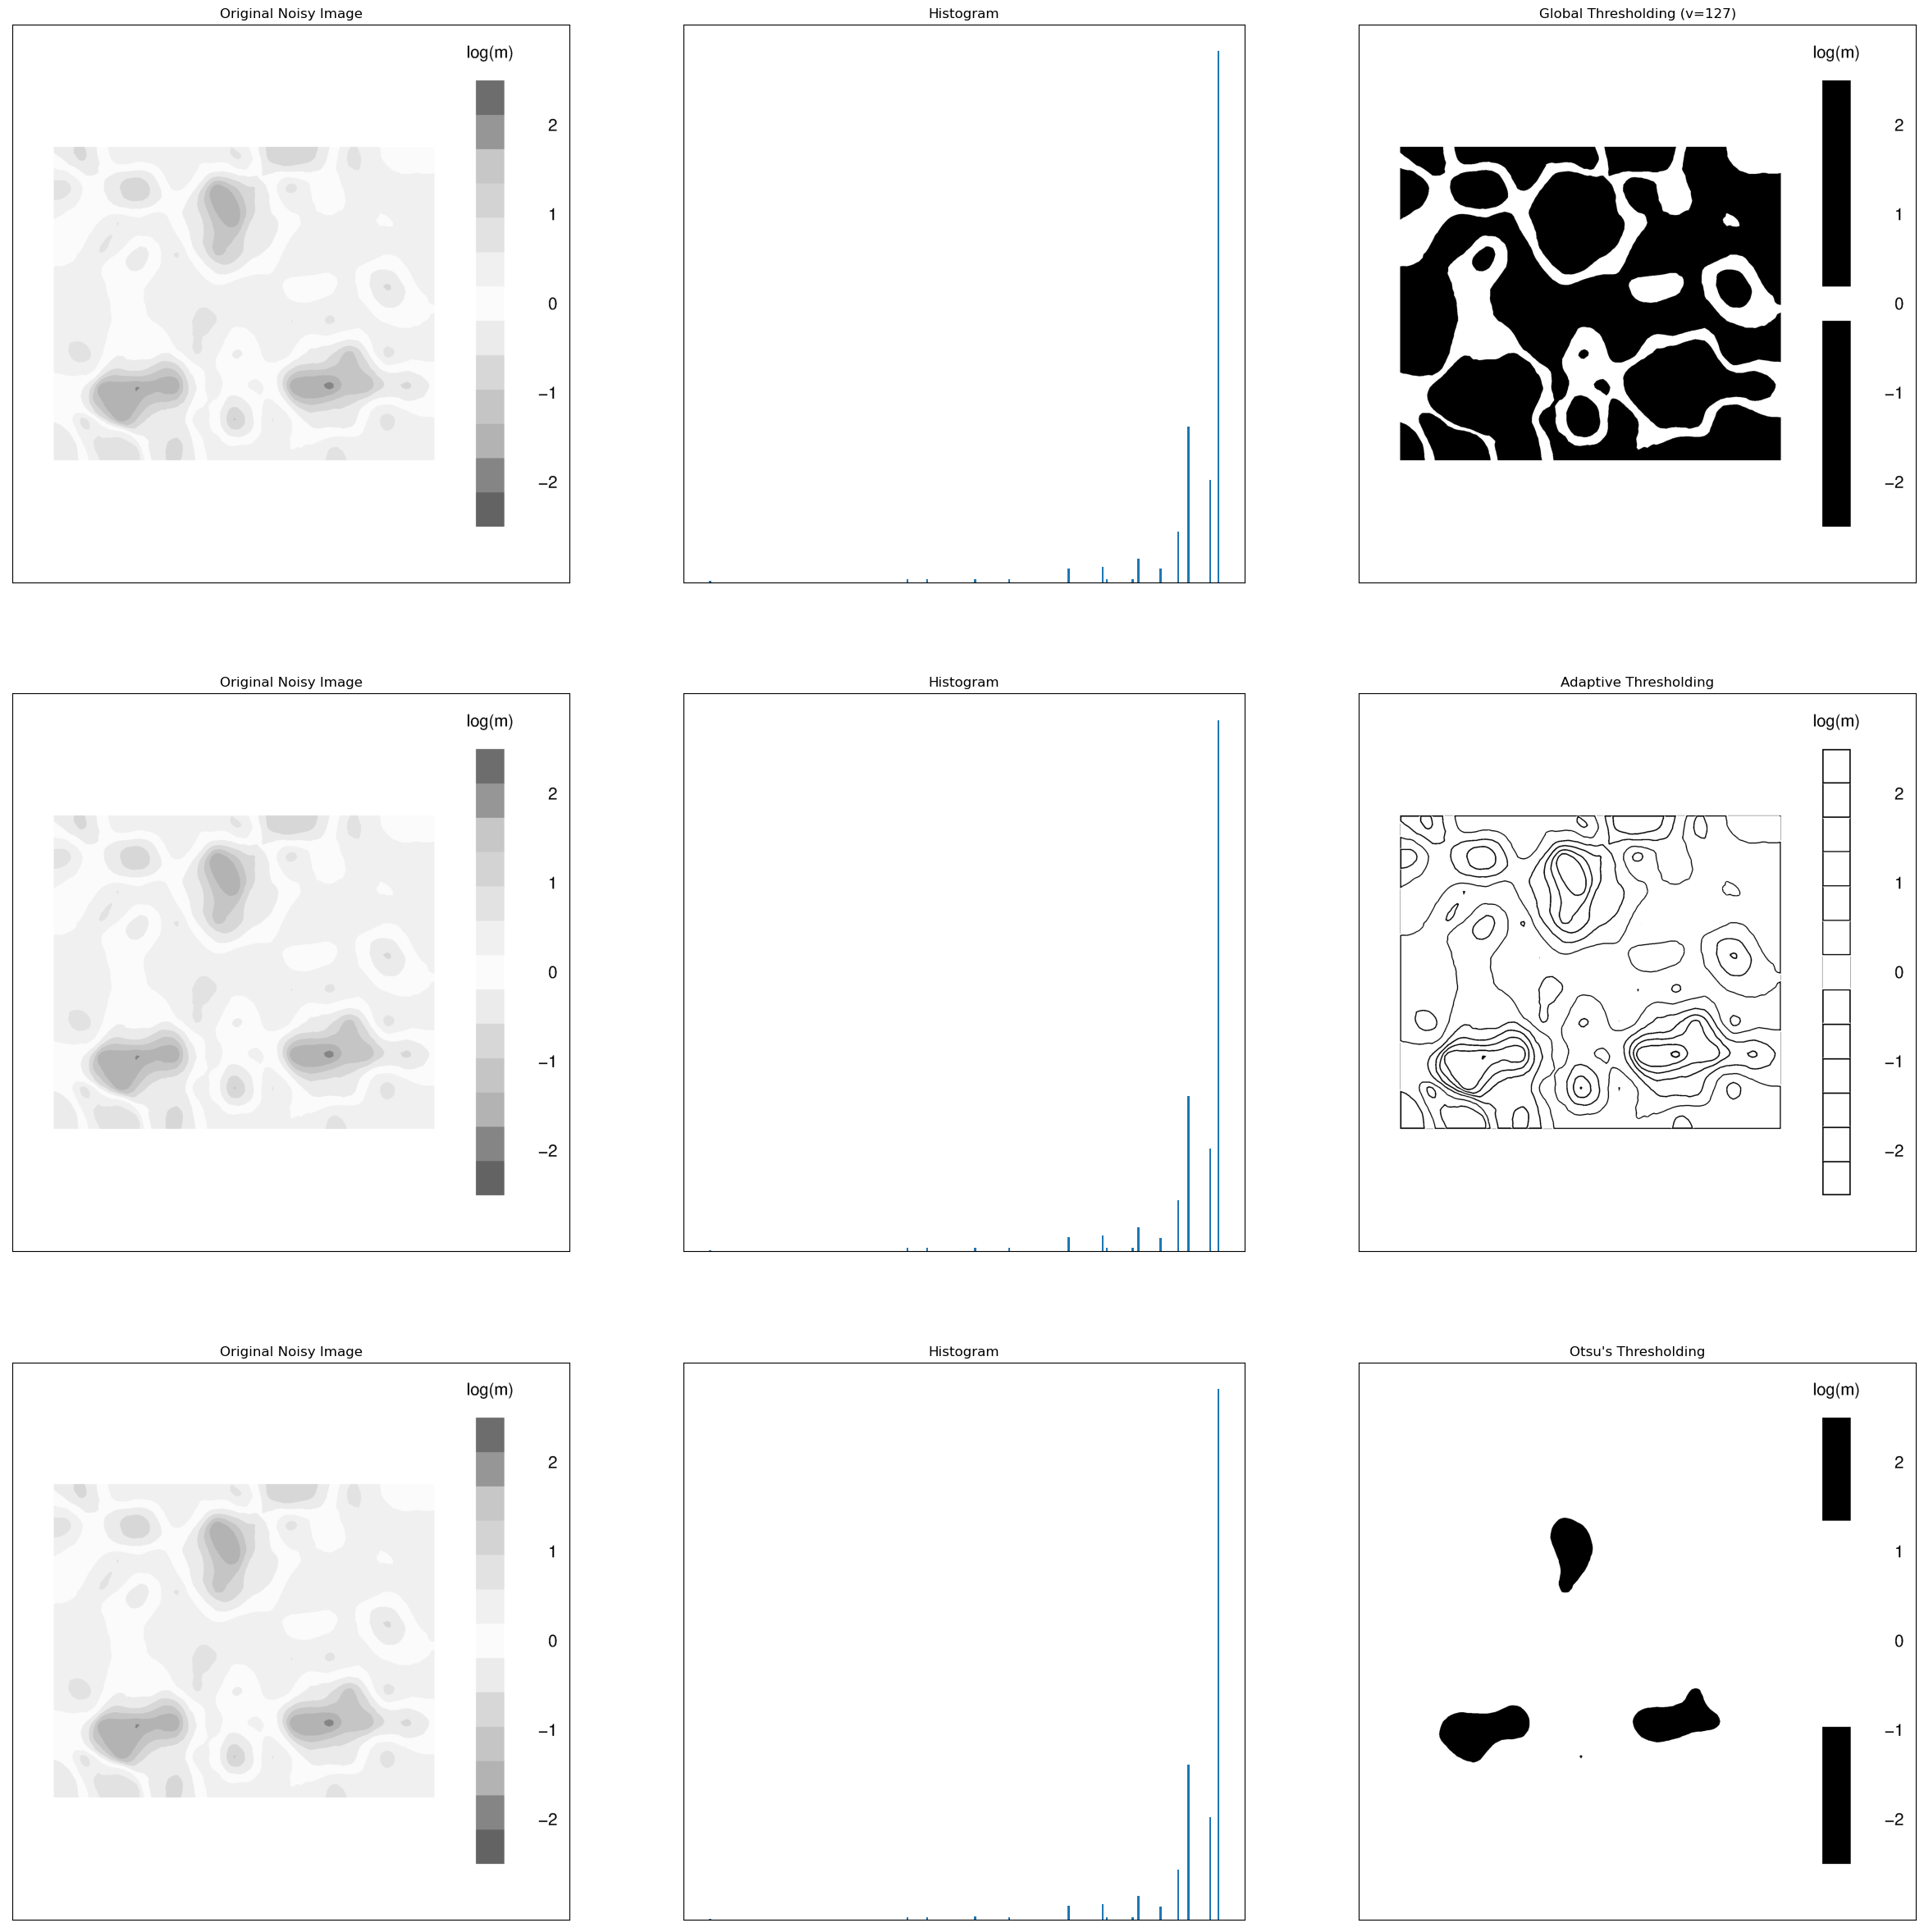

In [152]:
images = [img, 0, th1, img, 0, th2, img, 0, th3]
titles = [
  'Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
  'Original Noisy Image', 'Histogram', "Adaptive Thresholding",
  'Original Noisy Image', 'Histogram', "Otsu's Thresholding"
]

plt.subplots(figsize=(30,30))

for i in range(3):
  plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 3], 'gray')
  plt.title(titles[i * 3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 3].ravel(), 256)
  plt.title(titles[i * 3 + 1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 3 + 2], 'gray')
  plt.title(titles[i * 3 + 2]), plt.xticks([]), plt.yticks([])
plt.show()

In [153]:
filenameout = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/th1.png'
  
# Using cv2.imwrite() method
# Saving the image

th1.dtype='uint8'
cv2.imwrite(filenameout, (th1))


True

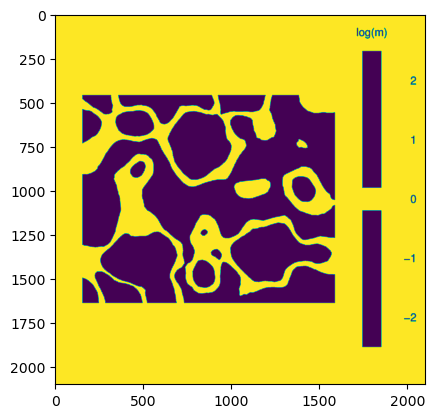

In [154]:
plt.imshow(th1)

In [155]:
imgout = cv2.imread(filenameout, 0)
from skimage import morphology, filters
binary = imgout > filters.threshold_otsu(imgout)
np.unique(binary)

array([False,  True])

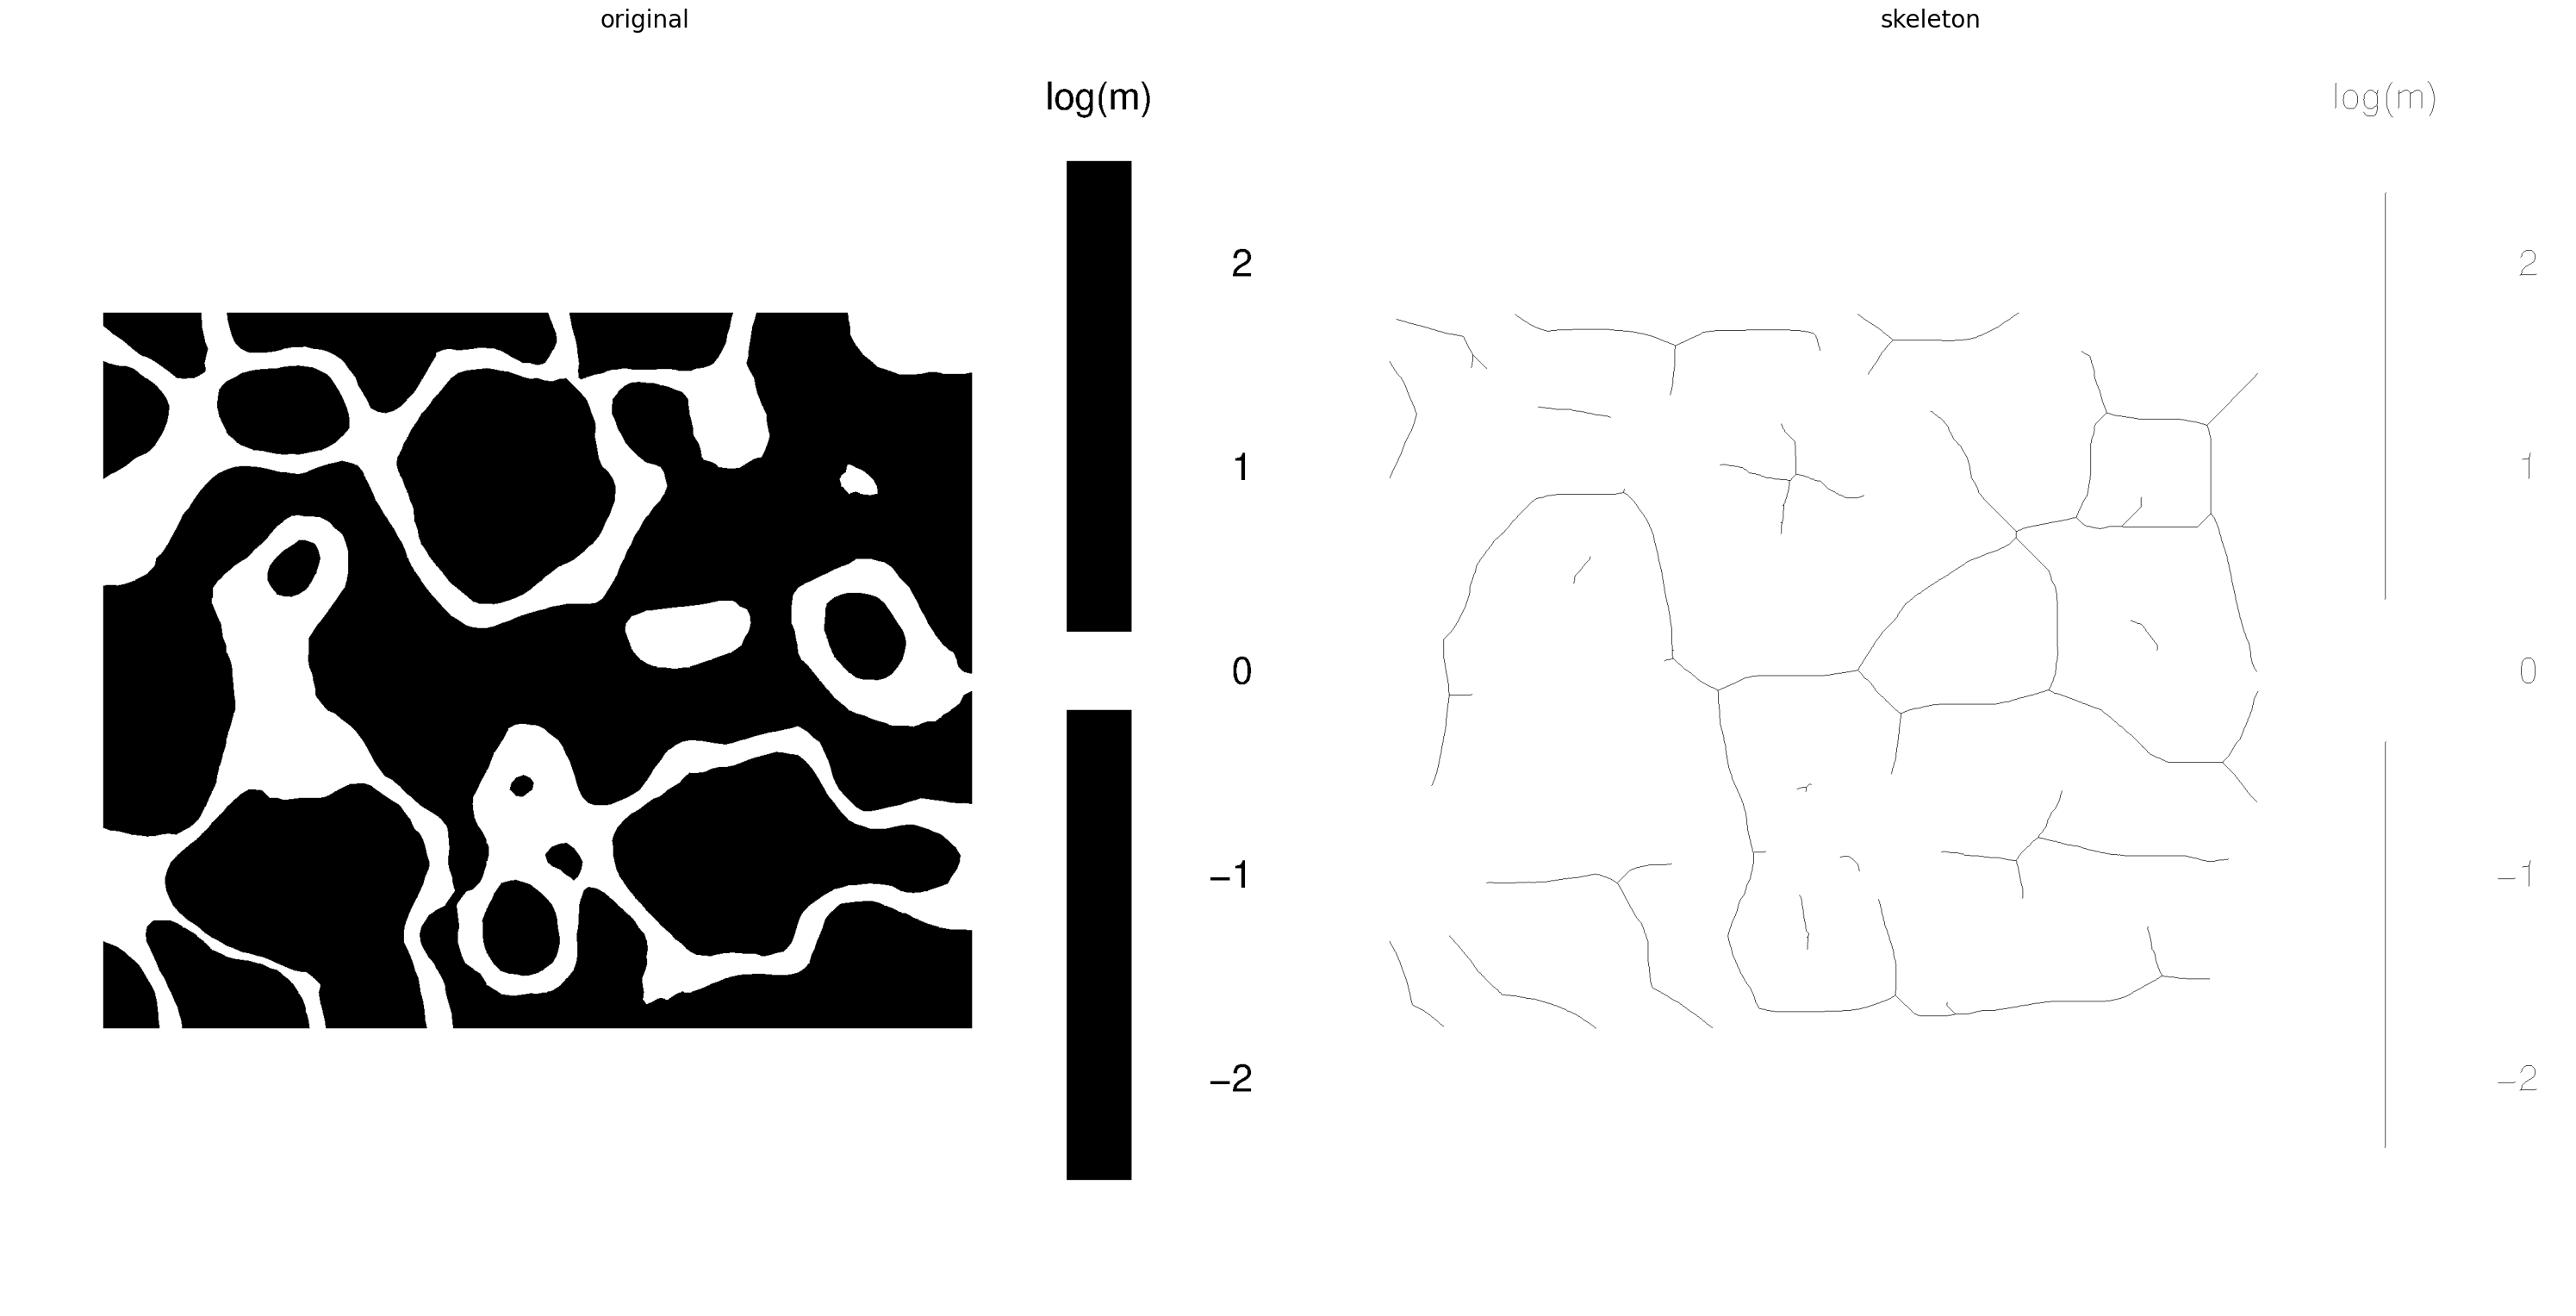

In [156]:
image = invert(binary)
# perform skeletonization
skeleton = skeletonize(image)
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 30),
                         sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(invert(image), cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(invert(skeleton), cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

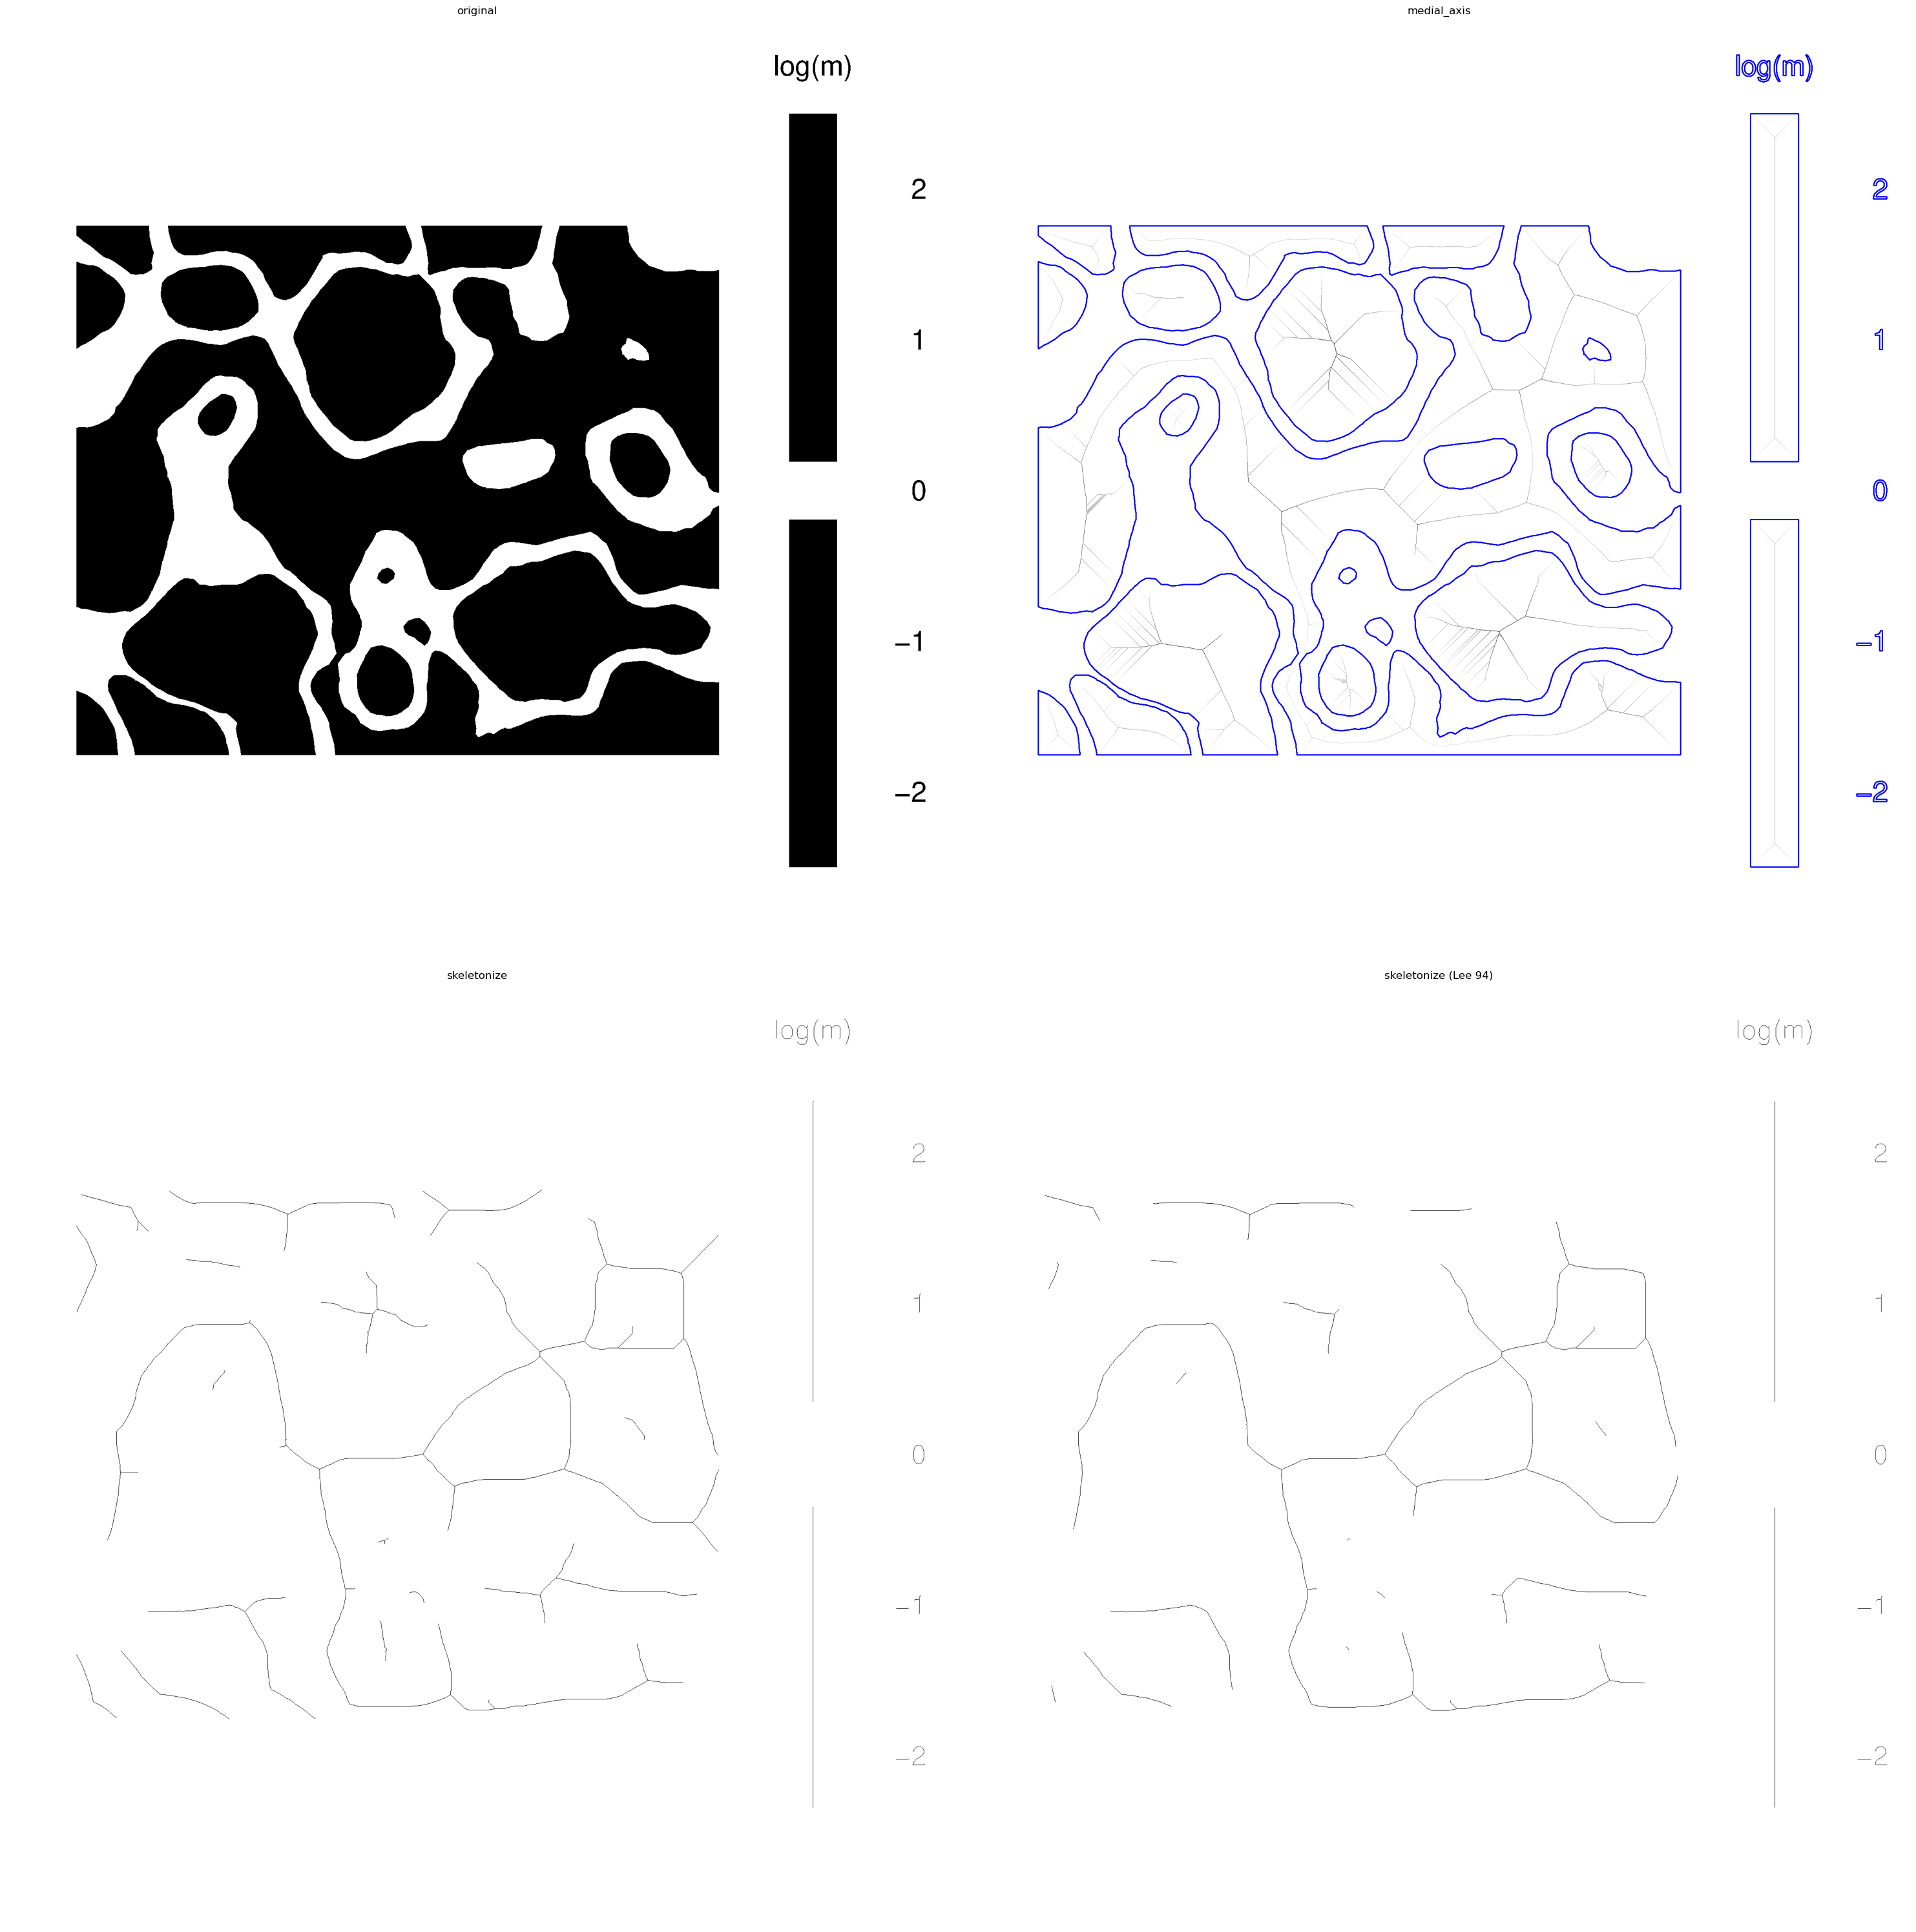

In [157]:
from skimage.morphology import medial_axis, skeletonize

# Generate the data
blobs = image

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(30, 30), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(invert(blobs), cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(invert(dist_on_skel), cmap=plt.cm.gray)
ax[1].contour((blobs), [0.5], colors='b')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(invert(skeleton), cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(invert(skeleton_lee), cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

In [158]:
from skimage.morphology import skeletonize
import cv2

# Generate the data
blobs = image
if blobs.max() > 1:
    # Convert to a binary image
    blobs = (blobs > 0).astype('uint8')
skeleton = skeleton_lee

# Invert the skeleton image
skeleton_inverted = cv2.bitwise_not(skeleton.astype('uint8'))

if skeleton_inverted.max() == 0:
    print("The skeleton image is completely black.")
else:
    # Save the skeleton image to a file
    sknameout = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/sk3.png'
    cv2.imwrite(sknameout, skeleton_inverted)

In [159]:
#!conda install Pillow --yes

In [160]:
from PIL import Image

In [161]:
img = Image.open('/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/sk3.png')

#!/usr/bin/env python3

from PIL import Image, ImageMorph, ImageFilter

# Open star image and ensure greyscale
im = img

# Detect edges and save
edges = im.filter(ImageFilter.FIND_EDGES)

# Make fatter edges and save
#fatEdges = edges.filter(ImageFilter.MaxFilter)
#fatEdges.show()

# Make very fat edges and save
veryFatEdges = edges.filter(ImageFilter.MaxFilter(7))
veryFatEdges.show()

In [162]:
#box = (360, 360, 1500, 1700)

box = (0, 0, 1710, 2100)
#img2=img
img2 = veryFatEdges.crop(box)
img2.save('/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/myimage_cropped.png')
img2.show()

In [163]:
#box = (1080, 1080, 4500, 5100)
#img_map2 = img_map.crop(box)
#img_map2.show()

In [164]:
import shutil
from osgeo import gdal, osr

In [165]:
orig_fn = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/myimage_cropped.png'
output_fn = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/sample15/output2.tif'

In [166]:
ds = gdal.Translate('/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/sample15/test_new95.tif', orig_fn)

In [167]:
import rasterio as rio
from rasterio.transform import from_gcps
from rasterio.control import GroundControlPoint

In [168]:
# Set spatial reference:
sr = osr.SpatialReference()
sr.ImportFromEPSG(4326) #My projection system

# Enter the GCPs
#   Format: [map x-coordinate(longitude)], [map y-coordinate (latitude)], [elevation],
#   [image column index(x)], [image row index (y)]

gcps = [gdal.GCP(107.54331207,14.68532181, 0, 1424.26496069,510.38769040),
        gdal.GCP(106.26052094,14.48458099, 0, 1146.47131718,554.91399185),
        gdal.GCP(102.33943176,13.53230095, 0, 303.80137656,761.67997193),
        gdal.GCP(102.50865936,12.67811012, 0, 340.04341477,947.90308130),
        gdal.GCP(103.12083435,10.87361240, 0, 478.47928348,1331.48327259),
        gdal.GCP(105.33587646,10.86013985, 0, 950.59520857,1340.20195839),
        gdal.GCP(106.19005585,10.78874969, 0, 1135.82273041,1356.96551410),
        gdal.GCP(107.41720581,12.24043655, 0, 1399.11981523,1036.78299011),
        gdal.GCP(107.44969177,14.41580105, 0, 1398.95417871,566.88913693),
        gdal.GCP(106.47834778,14.51133060, 0, 1200.21340424,549.05845361),
        gdal.GCP(106.43508911,14.51879978, 0, 1189.61552359,547.15006390),
        gdal.GCP(107.39186096,14.32227039, 0, 1387.25786005,589.14102054)]

# Apply the GCPs to the open output file:
ds.SetGCPs(gcps, sr.ExportToWkt())
del ds

In [169]:
# # Set spatial reference:
# sr = osr.SpatialReference()
# sr.ImportFromEPSG(4326) #My projection system

# # Enter the GCPs
# #   Format: [map x-coordinate(longitude)], [map y-coordinate (latitude)], [elevation],
# #   [image column index(x)], [image row index (y)]

# gcps = [gdal.GCP(107.55589294,14.68574047, 0, 909.71500812,456.55471995),
#         gdal.GCP(106.25990295,14.48468113, 0, 673.38204668,496.44220210),
#         gdal.GCP(103.43640137,14.38899231, 0, 159.03573256,514.18761478),
#         gdal.GCP(102.62536621,13.60903931, 0, 8.95749298,657.67277962),
#         gdal.GCP(103.50115967,10.60231686, 0, 174.75460231,1207.54218135),
#         gdal.GCP(104.49848938,10.40616798, 0, 353.74277681,1241.64211092),
#         gdal.GCP(105.11163330,10.96184444, 0, 462.26149287,1144.51083267),
#         gdal.GCP(105.33747101,10.85966778, 0, 506.15849689,1164.35095765),
#         gdal.GCP(107.33415985,14.10617065, 0, 872.08615263,563.71977751)]

# # Apply the GCPs to the open output file:
# ds.SetGCPs(gcps, sr.ExportToWkt())
# del ds

In [170]:
#with rasterio.open('/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Malaria/skeleton/eems_skeleton/test_new before.tif') as src:
#    array = src.read(1)

In [171]:
#print(src.crs)

In [172]:
#print(src.transform)

In [173]:
# gcps_t = [GroundControlPoint(510.38769040,1424.26496069,107.54331207,14.68532181,0),
# GroundControlPoint(554.91399185,1146.47131718,106.26052094,14.48458099,0),
# GroundControlPoint(761.67997193,303.80137656,102.33943176,13.53230095,0),
# GroundControlPoint(947.90308130,340.04341477,102.50865936,12.67811012,0),
# GroundControlPoint(1331.48327259,478.47928348,103.12083435,10.87361240,0),
# GroundControlPoint(1340.20195839,950.59520857,105.33587646,10.86013985,0),
# GroundControlPoint(1356.96551410,1135.82273041,106.19005585,10.78874969,0),
# GroundControlPoint(1036.78299011,1399.11981523,107.41720581,12.24043655,0),
# GroundControlPoint(566.88913693,1398.95417871,107.44969177,14.41580105,0),
# GroundControlPoint(549.05845361,1200.21340424,106.47834778,14.51133060,0),
# GroundControlPoint(547.15006390,1189.61552359,106.43508911,14.51879978,0),
# GroundControlPoint(589.14102054,1387.25786005,107.39186096,14.32227039,0)]

In [174]:
#the corrdinates is different from previous one, please NOTE
gcps_t = [GroundControlPoint(510.38769040,1424.26496069,107.54331207,14.68532181,0),
GroundControlPoint(554.91399185,1146.47131718,106.26052094,14.48458099,0),
GroundControlPoint(761.67997193,303.80137656,102.33943176,13.53230095,0),
GroundControlPoint(947.90308130,340.04341477,102.50865936,12.67811012,0),
GroundControlPoint(1331.48327259,478.47928348,103.12083435,10.87361240,0),
GroundControlPoint(1340.20195839,950.59520857,105.33587646,10.86013985,0),
GroundControlPoint(1356.96551410,1135.82273041,106.19005585,10.78874969,0),
GroundControlPoint(1036.78299011,1399.11981523,107.41720581,12.24043655,0),
GroundControlPoint(566.88913693,1398.95417871,107.44969177,14.41580105,0),
GroundControlPoint(549.05845361,1200.21340424,106.47834778,14.51133060,0),
GroundControlPoint(547.15006390,1189.61552359,106.43508911,14.51879978,0),
GroundControlPoint(589.14102054,1387.25786005,107.39186096,14.32227039,0)]
transform = from_gcps(gcps_t)
crs = 'epsg:4326'

with rio.open('/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/sample15/test_new95.tif', 'r+') as ds:
              ds.crs = crs
              ds.transform = transform
del ds

In [175]:
# #the corrdinates is different from previous one, please NOTE
# gcps_t = [GroundControlPoint(456.55471995,909.71500812,107.55589294,14.68574047,0),
#         GroundControlPoint(496.44220210,673.38204668,106.25990295,14.48468113,0),
#         GroundControlPoint(514.18761478, 159.03573256,103.43640137,14.38899231,0),
#         GroundControlPoint(657.67277962,8.95749298, 102.62536621,13.60903931,0),
#         GroundControlPoint(1207.54218135,174.75460231, 103.50115967,10.60231686,0),
#         GroundControlPoint(1241.64211092,353.74277681, 104.49848938,10.40616798,0),
#         GroundControlPoint(1144.51083267, 462.26149287,105.11163330,10.96184444,0),
#         GroundControlPoint(1164.35095765, 506.15849689,105.33747101,10.85966778,0),
#         GroundControlPoint(563.71977751, 872.08615263,107.33415985,14.10617065,0)]
# transform = from_gcps(gcps_t)
# crs = 'epsg:4326'

# with rio.open('/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Malaria/skeleton/test_new_test.tif', 'r+') as ds:
#               ds.crs = crs
#               ds.transform = transform
# del ds

In [176]:
#from itertools import chain
 
# initializing matrix
#test_matrix = array

# using chain() + set()
# for checking unique values in matrix
#res = list(set(chain(*test_matrix)))
 
# printing result
#print ("Unique values in matrix are : " + str(res))

In [177]:
#isinstance(np.nan, int)  # True

#array = array.astype(np.float32)
#array[array==255] = np.nan
#array

In [178]:
import rasterio
from rasterio.features import shapes
mask = None
with rasterio.Env():
    with rasterio.open('/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/sample15/test_new95.tif') as src:
        image = src.read(1)
        results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(
            shapes(image, mask=mask, transform=src.transform)))

In [179]:
del src

In [180]:
geoms = list(results)
import geopandas as gp
gpd_polygonized_raster  = gp.GeoDataFrame.from_features(geoms)



<AxesSubplot: >

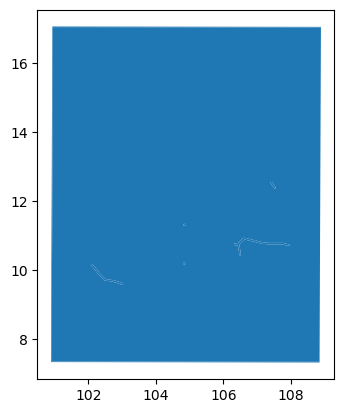

In [181]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
gpd_polygonized_raster.crs = 'EPSG:4326'
gpd_polygonized_raster.plot()


In [182]:
gpd_polygonized_raster.head()

,geometry,raster_val
0,"POLYGON ((106.10516 14.74483, 106.10514 14.740...",255.0
1,"POLYGON ((101.69857 14.88965, 101.69839 14.848...",255.0
2,"POLYGON ((102.94417 14.81395, 102.94415 14.809...",255.0
3,"POLYGON ((102.80219 14.21771, 102.80202 14.176...",255.0
4,"POLYGON ((101.82584 14.20057, 101.82565 14.154...",255.0


In [183]:
type(gpd_polygonized_raster)

geopandas.geodataframe.GeoDataFrame

In [184]:
filtered_gpd_df = gpd_polygonized_raster[gpd_polygonized_raster['raster_val'] == 255]


In [185]:
import geopandas as gpd

# Assuming gpd_polygonized_raster is your GeoDataFrame
# Convert the GeoDataFrame to a JSON string
geojson_str = filtered_gpd_df.to_json()

# Specify the path to your output file
output_file_path = '/Users/yaoli/Library/Mobile Documents/com~apple~CloudDocs/Paper/refiningeems/output/forske/outputs/sample15/file95.geojson'

# Write the JSON string to a file
with open(output_file_path, 'w') as file:
    file.write(geojson_str)



In [186]:
gpd_polygonized_raster.geometry

0     POLYGON ((106.10516 14.74483, 106.10514 14.740...
1     POLYGON ((101.69857 14.88965, 101.69839 14.848...
2     POLYGON ((102.94417 14.81395, 102.94415 14.809...
3     POLYGON ((102.80219 14.21771, 102.80202 14.176...
4     POLYGON ((101.82584 14.20057, 101.82565 14.154...
5     POLYGON ((107.15786 14.12381, 107.15784 14.119...
6     POLYGON ((104.16715 13.78120, 104.16697 13.739...
7     POLYGON ((103.15530 13.06133, 103.15528 13.056...
8     POLYGON ((107.39765 12.55147, 107.39747 12.509...
9     POLYGON ((106.44253 13.16310, 106.44251 13.158...
10    POLYGON ((104.83100 11.34366, 104.83098 11.339...
11    POLYGON ((105.12624 10.79767, 105.12607 10.756...
12    POLYGON ((106.58660 10.93898, 106.58659 10.934...
13    POLYGON ((104.80310 10.23405, 104.80292 10.192...
14    POLYGON ((103.17778 10.66630, 103.17776 10.661...
15    POLYGON ((101.74705 9.83142, 101.74686 9.78519...
16    POLYGON ((102.08325 10.18234, 102.08307 10.140...
17    POLYGON ((107.00181 14.60487, 107.00158 14